In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("./data/geonames-all-cities-with-a-population-1000.csv", sep=';')

myDf = df[['Name', 'Population']]
myDf[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
myDf['Latitude'] = myDf['Latitude'].astype(float)
myDf['Longitude'] = myDf['Longitude'].astype(float)

# remove where population 0
myDf = myDf[myDf['Population'] > 0]
#sort so populated spaces will be on top when plotting
myDf = myDf.sort_values(by=['Population'])


C:\Users\vadim\AppData\Local\Temp\ipykernel_11680\1857082084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
C:\Users\vadim\AppData\Local\Temp\ipykernel_11680\1857082084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
C:\Users\vadim\AppData\Local\Temp\ipykernel_11680\1857082084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

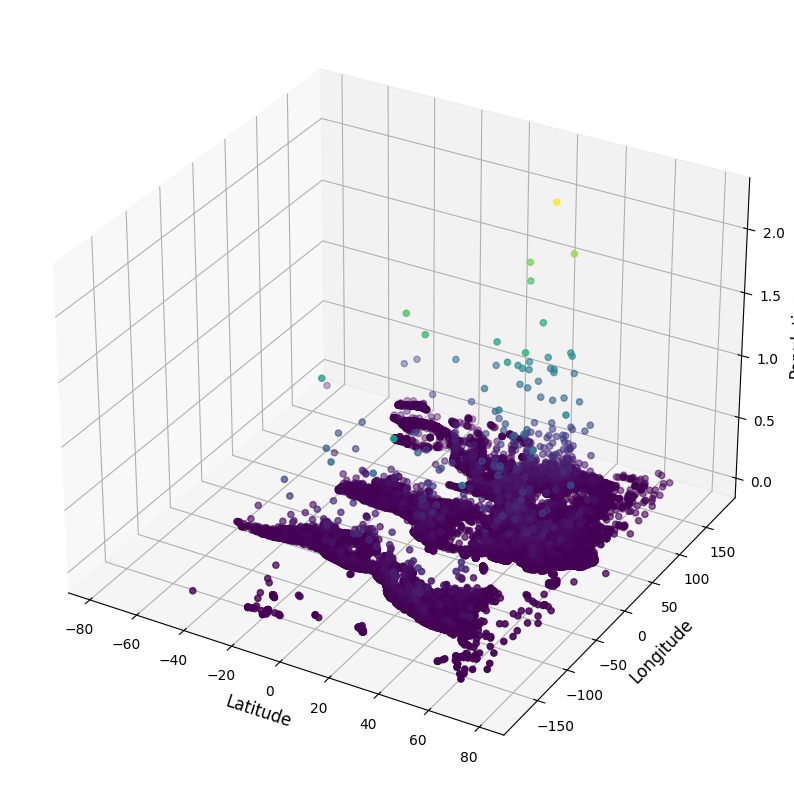

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 20))
ax = plt.axes(projection ='3d')

z = myDf['Population']
x = myDf['Latitude']
y = myDf['Longitude']

ax.scatter3D(x, y, z, c = z)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('Longitude', fontsize=12)
ax.set_zlabel('Population', fontsize=12)
plt.show()

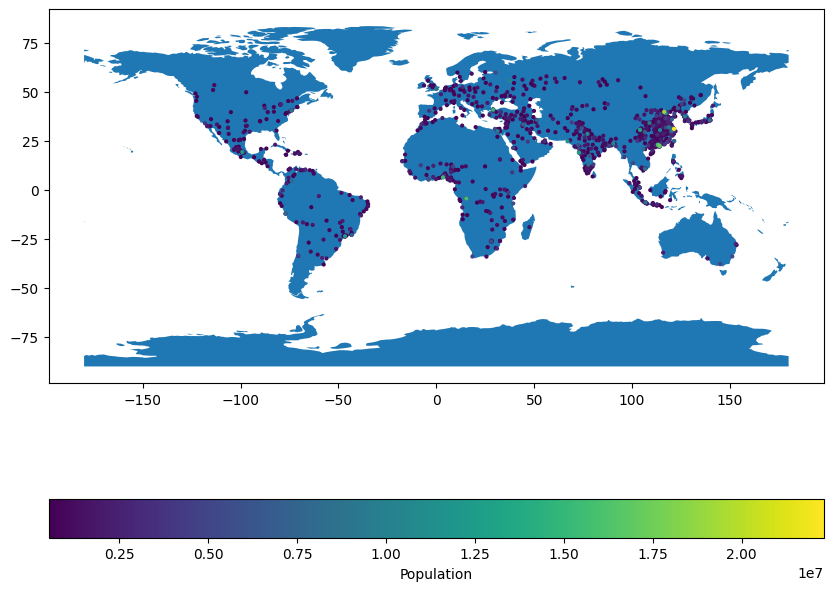

In [10]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

# get 1000 mosty populated places
df = myDf[-1000:]

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
# gdf.plot(ax=world.plot(figsize=(10, 10)), marker='o', c=df['Population'], markersize=3);

world.plot(figsize=(10, 10))
plt.scatter(x=df['Longitude'], y=df['Latitude'], c=df['Population'], s=4)
plt.colorbar(label='Population', orientation= 'horizontal')


возможно, я пришел к выводу, что самые населенные места - это те, которые находятся у воды